# Machine Learning Driven Option Pricing

1. Objective
2. Data Collection
3. Data Preprocessing
4. Model Selection and Training
5. Model Evaluation
6. Analysis of Results
7. Conclusion
8. References

## 1. Objective

Predict the prices of options using machine learning models and ccompare them to traditional pricing models like Black-Scholes.

**Deliverables**:
- A ML model that can predict option prices
- A comparison analysis between the predicted prices and the prices derived from the Black-Scholes model.

## 2. Data Collection

In [ ]:
# My API Key
# apikey = "6ER8CYPPF7N3KTM5"

In [24]:
import datetime
import json
import requests
import pandas as pd

import time
import os
import re

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime
import csv

In [5]:
dir_list = os.listdir()
print(dir_list)

['$PROFILE.txt', '.git', '.ruff_cache', 'EDGAR_Downloader.ipynb', 'financetoolkit_tester.ipynb', 'financial statements (aapl).xlsx', 'financial statements (cls).xlsx', 'financial statements (nvda).xlsx', 'financial statements (titn).xlsx', 'ml_options_pricing.ipynb', 'news_summary.ipynb', 'pull_historicals.ipynb', 'QQQ 2023-01-01 To 2023-10-31', 'README.md', 'scrape_news.ipynb', 'sec-edgar-filings', 'SPY 2023-01-01 to 2023-10-31', 'statarb_pairs_MM.ipynb']


In [6]:
symbols = ['qqq'] # lower case necessary
stock = symbols[0]

# List to hold all file names
files = []

# Command to get file names
dirContents = os.listdir("./QQQ 2023-01-01 To 2023-10-31") # data held in this folder

# Iterate through files
for f in dirContents:

    # Use RegEx to find files that match the pattern
    if (re.search(stock + r".+T15.+", f)): #if(re.search(stock + r".+T09.+", f)):
        files.append(f)
files.sort()
print(len(files))

303


In [ ]:
# Display all file names
# files

In [41]:
# Variables to hold data
flattened_data = []


# Open one file at a time in files list
for fileIndex in range(len(files)):
    
    # Create a file object for file
    fileData = open("./QQQ 2023-01-01 To 2023-10-31/" + files[fileIndex], "r")

    # Read all data from file
    data = fileData.readlines()

    # Close file since data is now saved in variable
    fileData.close()

    # Iterate through file data and save it all to one long string
    text = ""
    for l in data:
        text += l

    # Text is formatted in json, so we parse data into a python dictionary
    json_data = json.loads(text)


    for expirdate, strikes in json_data['callExpDateMap'].items():
        for strike, options in strikes.items():
            for option in options:
                flattened_data.append({
                    'symbol': option['symbol'],
                    'strikePrice': option['strikePrice'],
                    'dateToday': files[fileIndex][4:14],
                    'daysToExpiration': option['daysToExpiration'],
                    'bid': option['bid'],
                    'ask': option['ask'],
                    'bidAskSize': option['bidAskSize'],
                    'last': option['last'],
                    'lastSize': option['lastSize'],
                    'openInterest': option['openInterest'],
                    'volatility': option['volatility'],
                    'delta': option['delta'],
                    'gamma': option['gamma'],
                    'theta': option['theta'],
                    'vega': option['vega'],
                    'rho': option['rho'],
                    'theoreticalOptionValue': option['theoreticalOptionValue'],

                })

    
df = pd.DataFrame(flattened_data)
print(df)


                 symbol  strikePrice   dateToday  daysToExpiration    bid  \
0        QQQ_010323C210        210.0  2023-01-01                 2  56.72   
1        QQQ_010323C220        220.0  2023-01-01                 2  46.71   
2        QQQ_010323C225        225.0  2023-01-01                 2   0.00   
3        QQQ_010323C226        226.0  2023-01-01                 2  40.72   
4        QQQ_010323C227        227.0  2023-01-01                 2  39.72   
...                 ...          ...         ...               ...    ...   
1014988  QQQ_061826C515        515.0  2023-10-31               961  10.32   
1014989  QQQ_061826C520        520.0  2023-10-31               961   9.56   
1014990  QQQ_061826C525        525.0  2023-10-31               961   8.84   
1014991  QQQ_061826C530        530.0  2023-10-31               961   8.16   
1014992  QQQ_061826C535        535.0  2023-10-31               961   7.53   

           ask bidAskSize   last  lastSize  openInterest volatility  delta 

In [51]:
import yfinance as yf
startdate = "2023-01-01"
enddate = "2023-10-31"
qqq_data = yf.download('QQQ', start=startdate, end=enddate)

# Reset index to get date as a column
qqq_data.reset_index(inplace = True)

# Rename the column to match the other data
qqq_data.rename(columns = {'Date': 'dateToday'}, inplace = True)
print(qqq_data.head())


[*********************100%%**********************]  1 of 1 completed

   dateToday        Open        High         Low       Close   Adj Close  \
0 2023-01-03  268.649994  270.149994  262.130005  264.480011  261.902069   
1 2023-01-04  266.640015  267.450012  262.529999  265.739990  263.149750   
2 2023-01-05  264.040009  264.209991  261.260010  261.579987  259.030304   
3 2023-01-06  263.350006  269.940002  260.339996  268.799988  266.179901   
4 2023-01-09  270.829987  275.290009  269.920013  270.540009  267.902985   

     Volume  
0  42335300  
1  47754900  
2  45396700  
3  54659700  
4  45568700  


In [52]:
merged_data = pd.merge(df, qqq_data[['dateToday', 'Close']], on='dateToday', how='left')

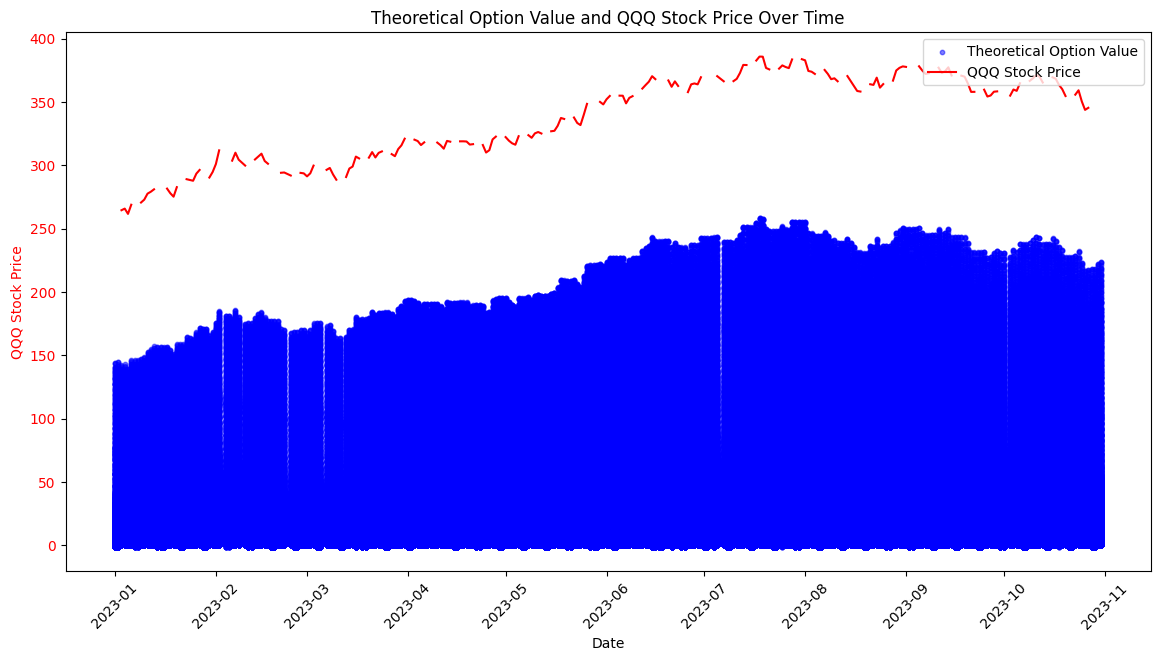

In [54]:
fig, ax1 = plt.subplots(figsize = (14, 7))

# Plot the theoretical option values on the first axis (left y-axis)
ax1.scatter(merged_data['dateToday'], merged_data['theoreticalOptionValue'], color='b', label='Theoretical Option Value', s=10, alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Theoretical Option Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')


# ax2 = ax1.twinx() # Create a second y-axis to plot the QQQ stock price
ax2 = ax1
ax2.plot(merged_data['dateToday'], merged_data['Close'], color='r', label='QQQ Stock Price')
ax2.set_ylabel('QQQ Stock Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Add a title
plt.title('Theoretical Option Value and QQQ Stock Price Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Data provided by YouTuber "Investing With MacKey", who retrieved the data from Ameritrade. 